In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [76]:
df = pd.read_csv('first inten project.csv')

Exploring data

In [77]:
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [78]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [80]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Checking null values & duplicates

In [81]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [82]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [83]:
df.duplicated().sum()

0

In [84]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

Feature Engineering

In [86]:
df.drop(columns=['Booking_ID','date of reservation'],inplace=True)

In [87]:
df['total_guest'] = df['number of adults'] + df['number of children']
df = df.drop(['number of adults', 'number of children'], axis=1)
df.head()

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total_guest
0,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2
1,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,1
2,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,3
3,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,1
4,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,1


Outlier detection & handling it

In [88]:
outlier_features =  df.drop(['type of meal','room type','market segment type','booking status'],axis = 1)

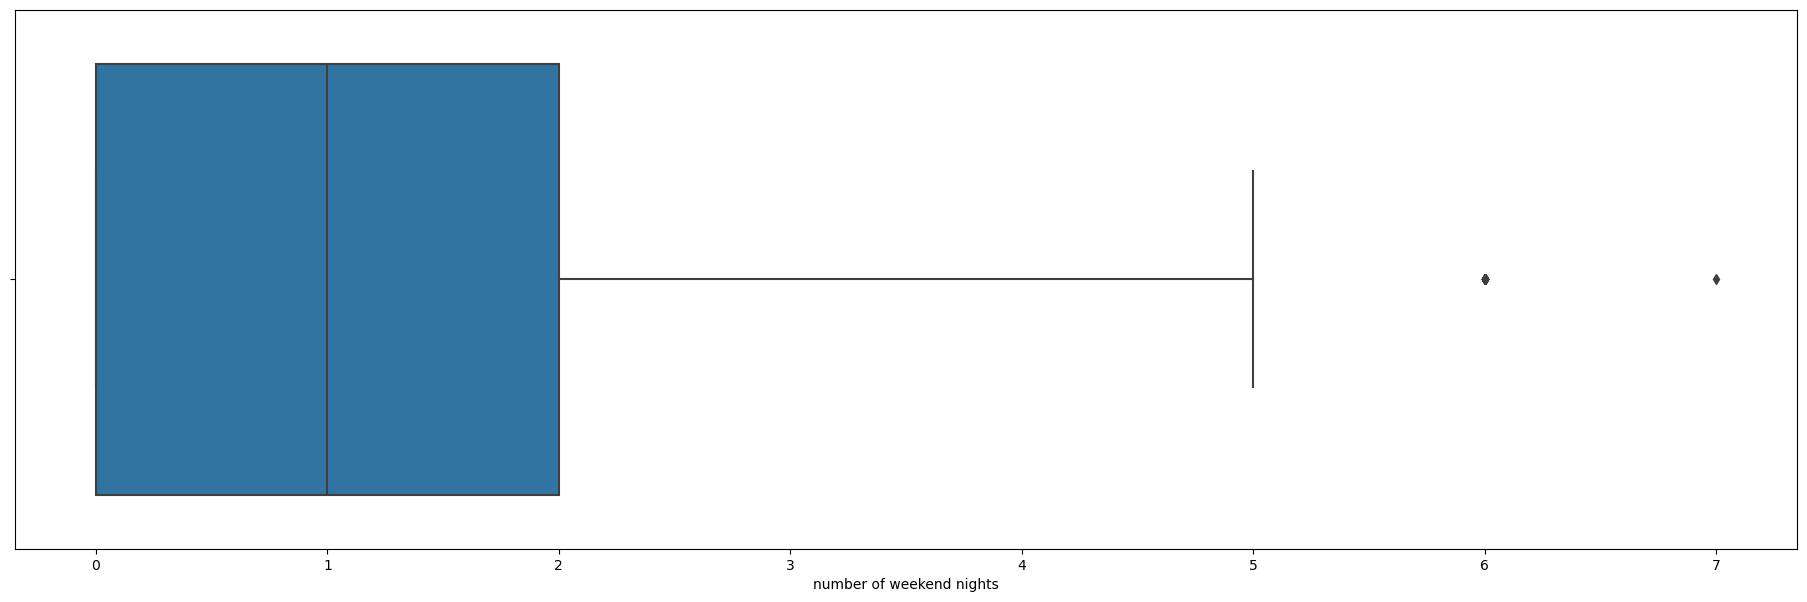

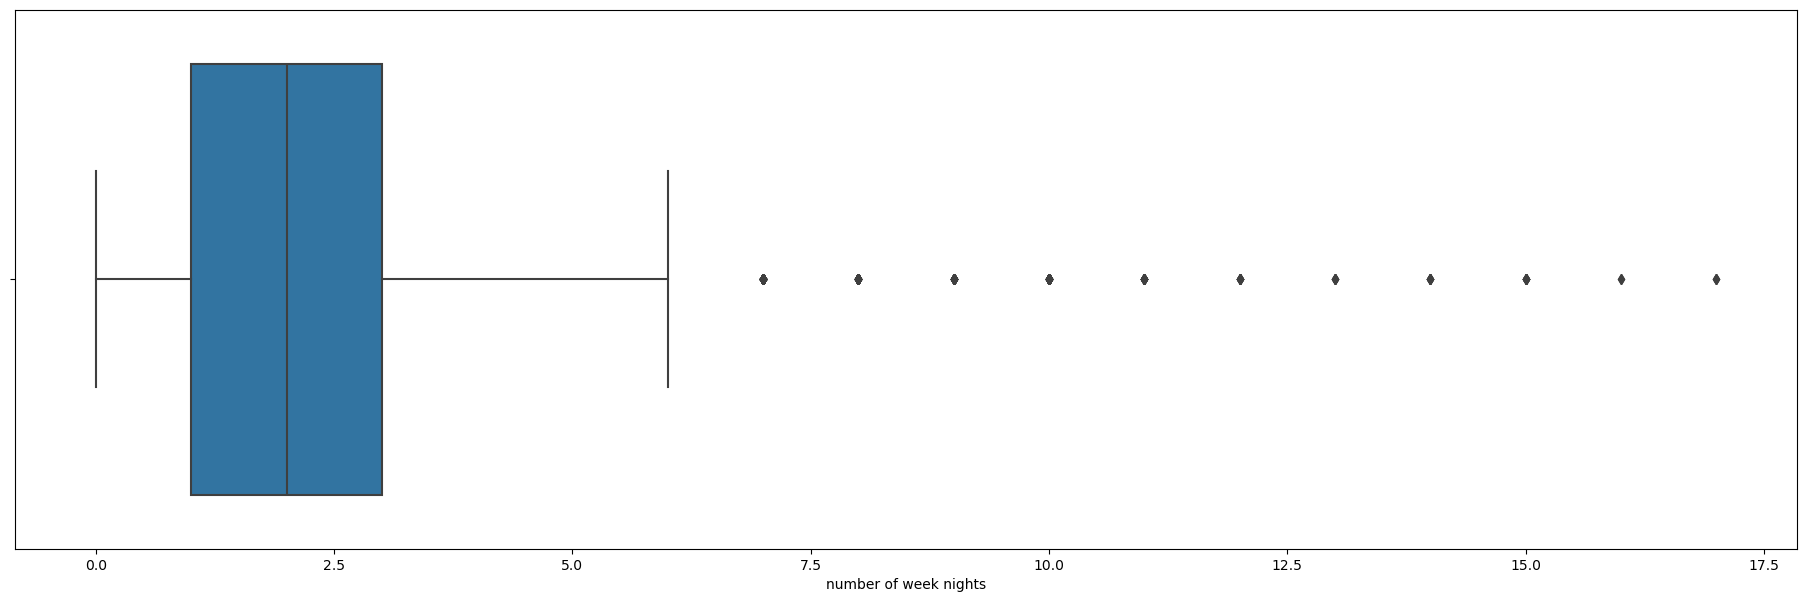

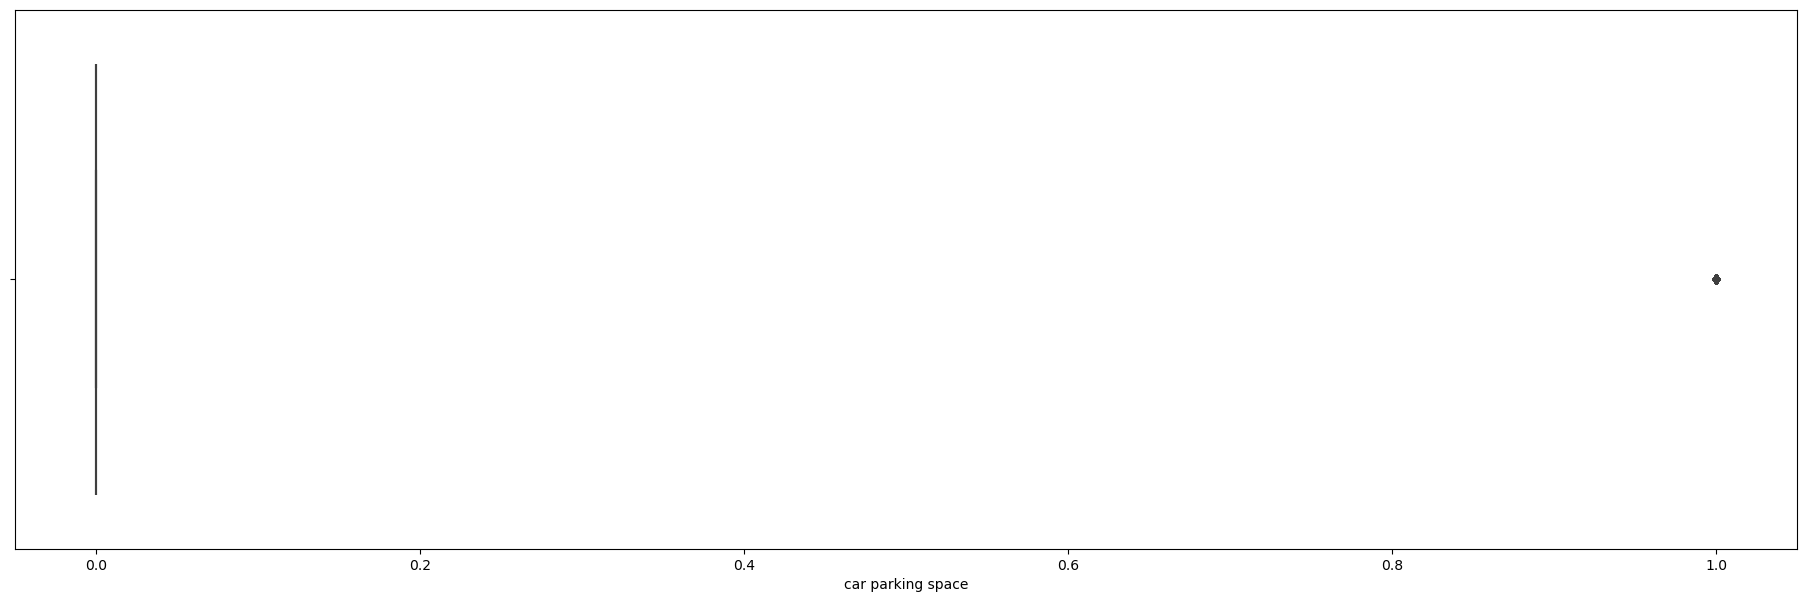

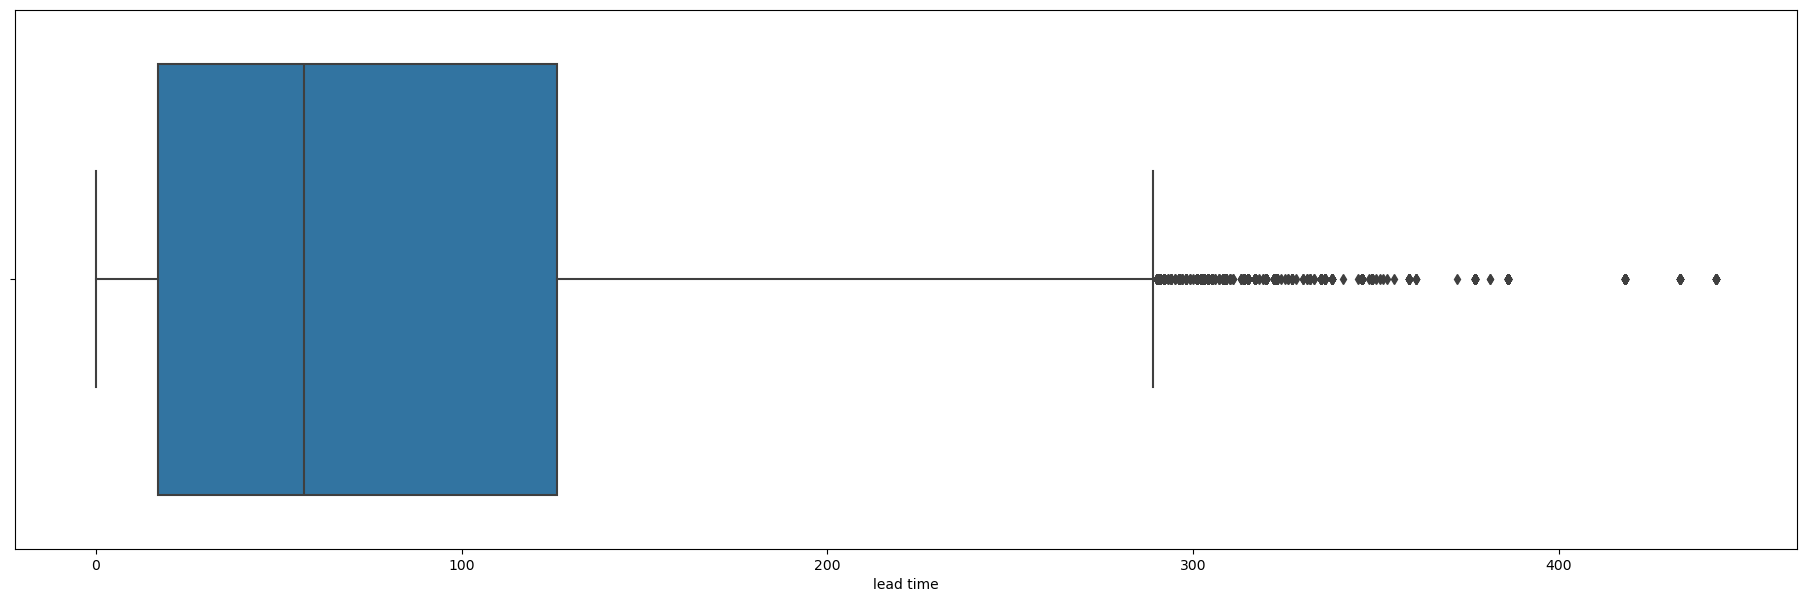

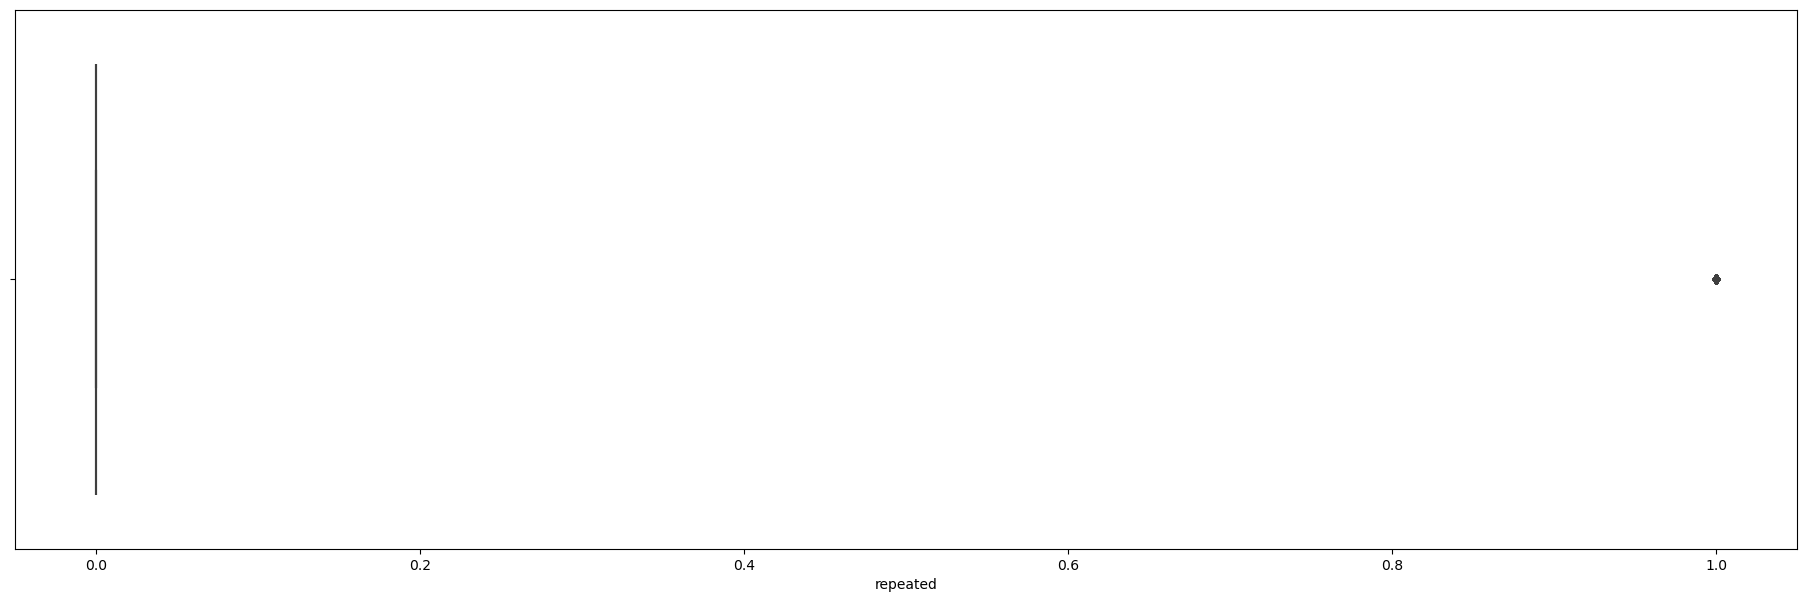

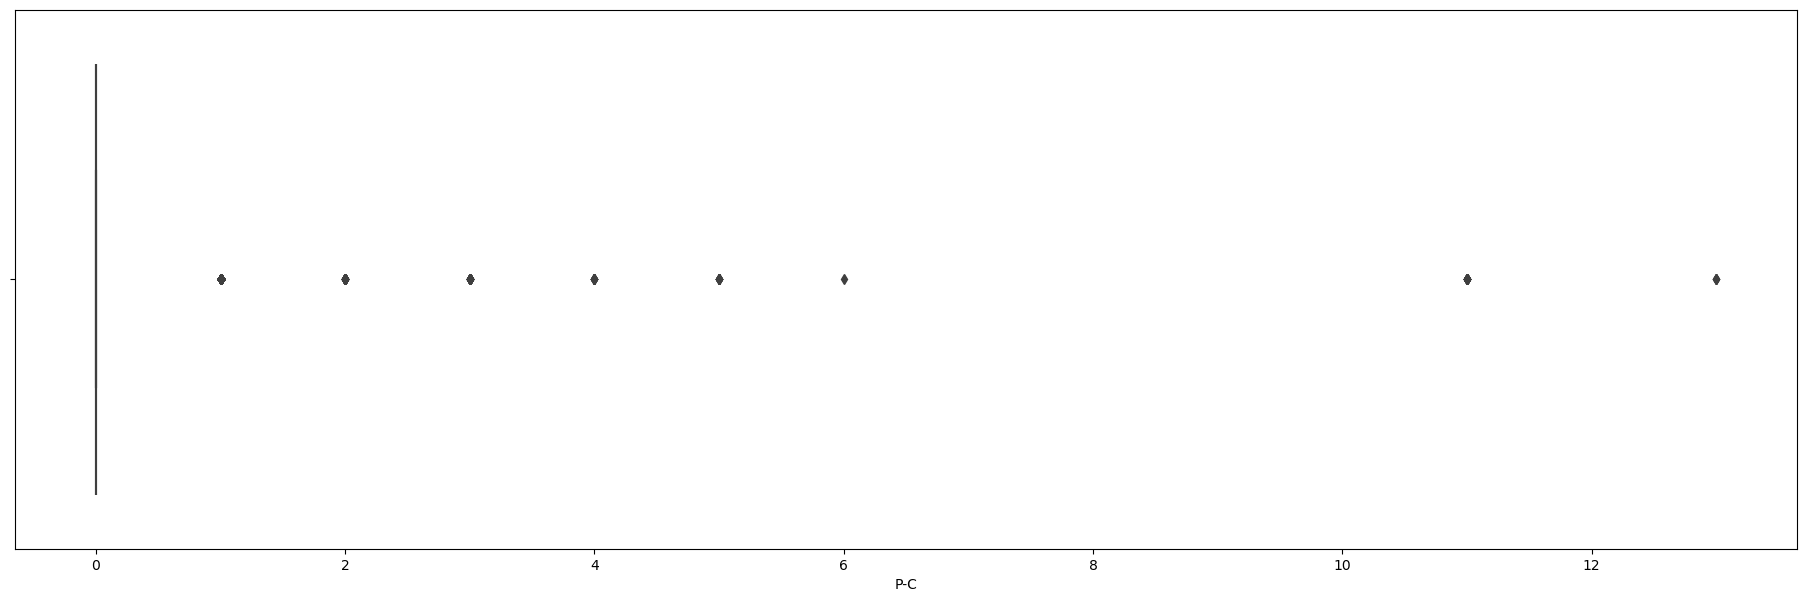

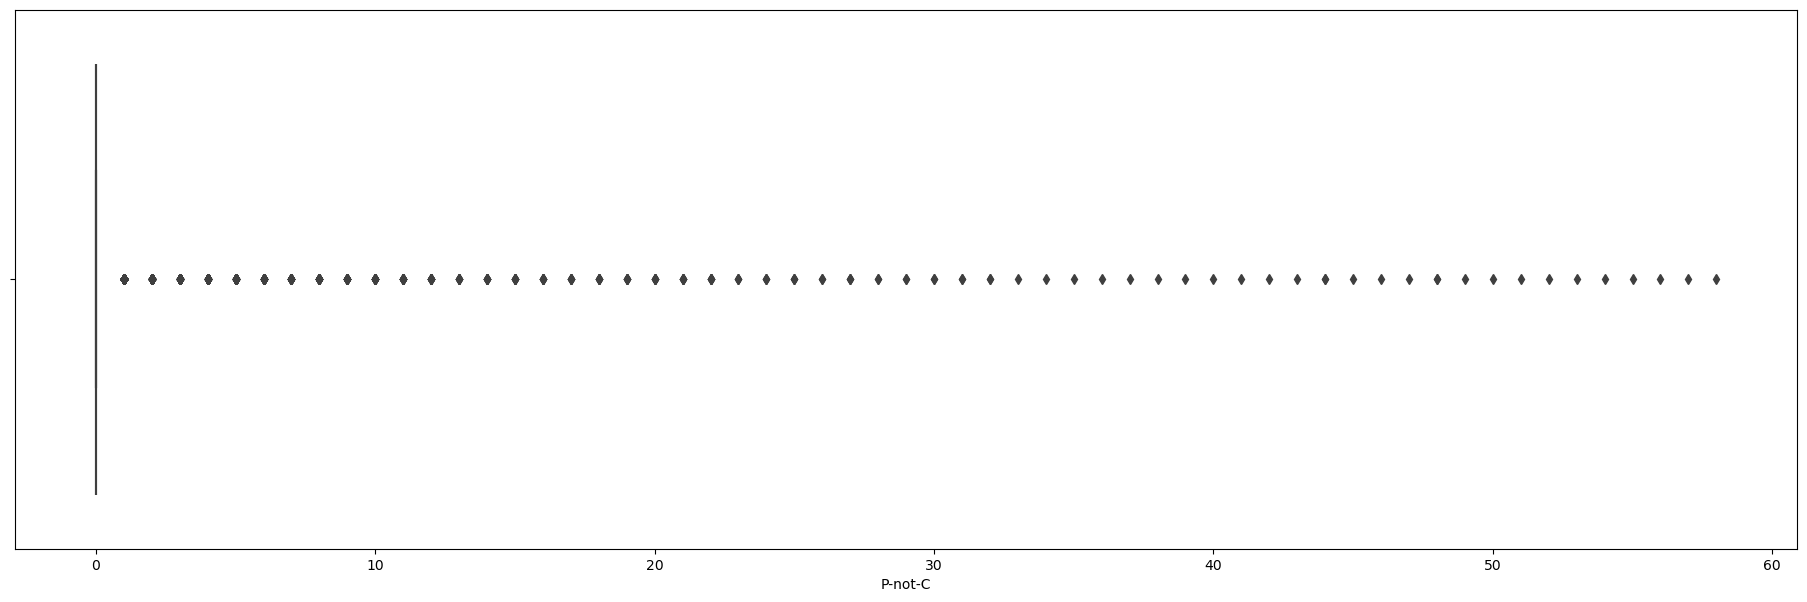

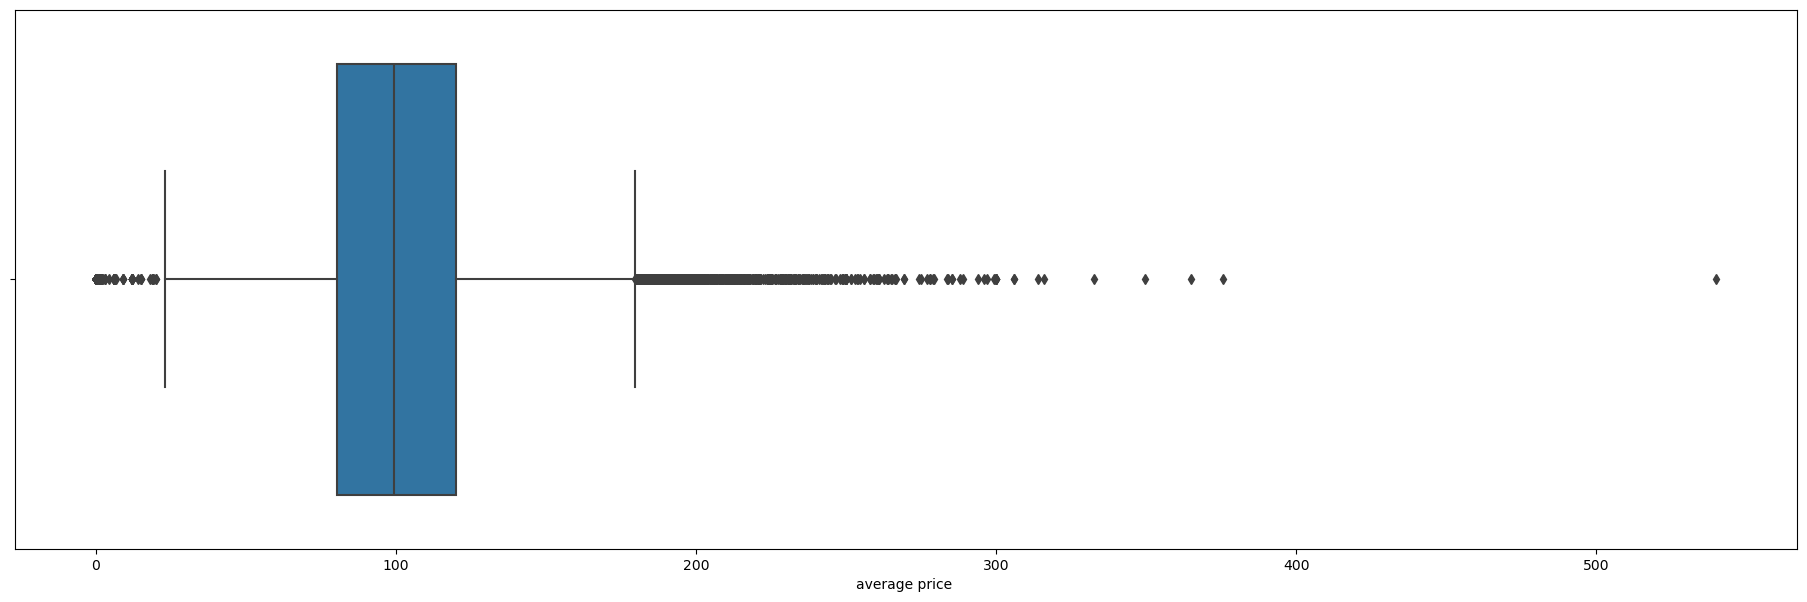

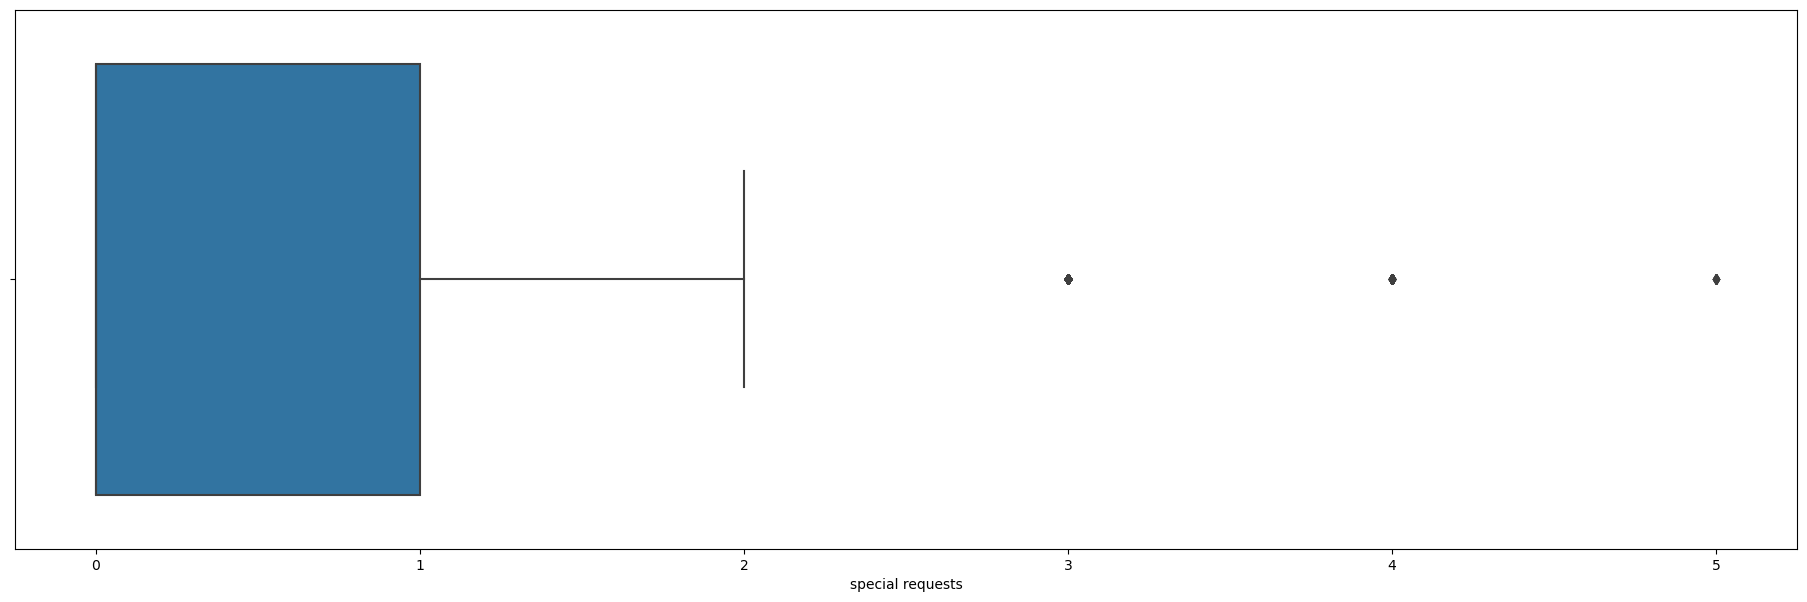

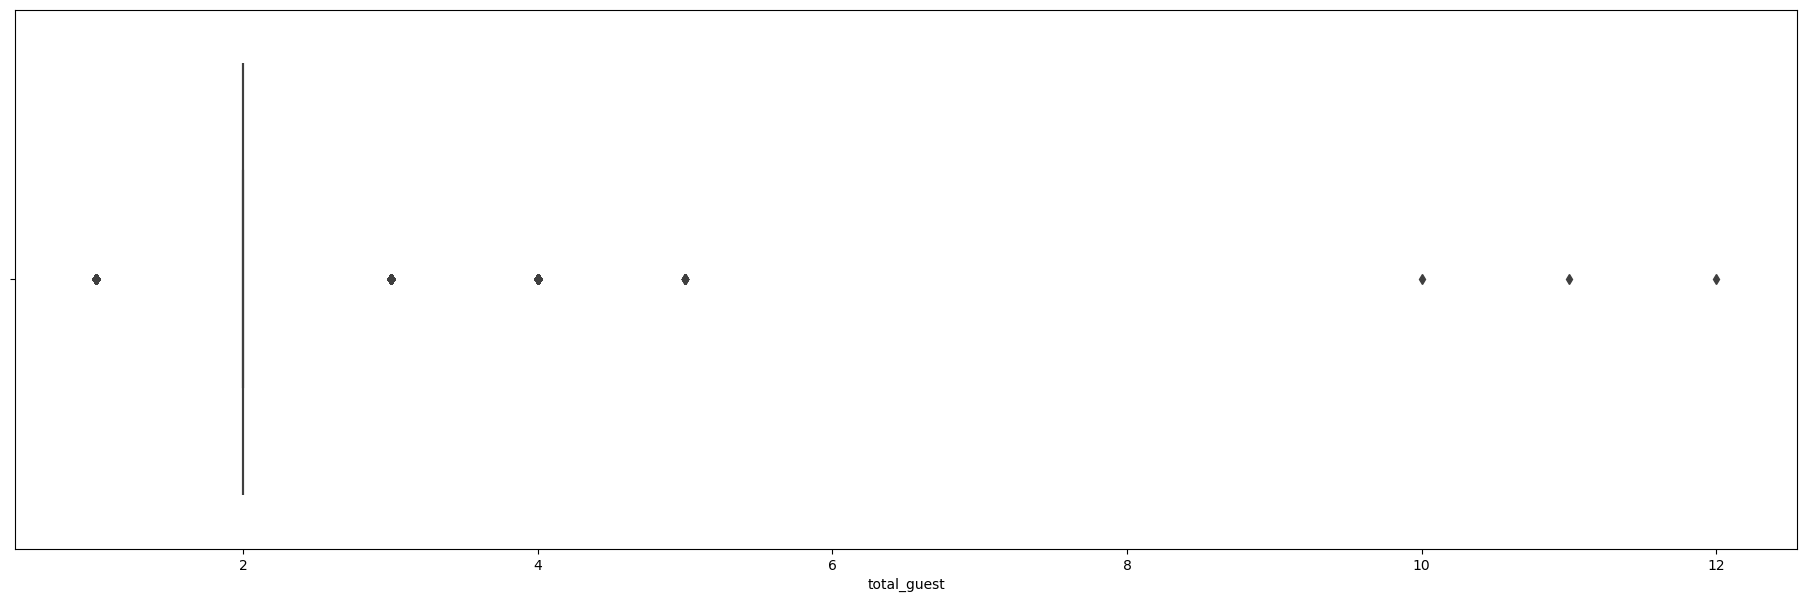

In [89]:
for feature in outlier_features:
    plt.figure(figsize=(23, 7))
    sns.boxplot(x=df[feature])

In [90]:
df.columns = df.columns.str.strip()

In [91]:
print(df.columns)

Index(['number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'booking status', 'total_guest'],
      dtype='object')


In [92]:
df['average price'].value_counts()

average price
65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
90.06       1
212.42      1
83.48       1
70.42       1
167.80      1
Name: count, Length: 3930, dtype: int64

Handling outlier

In [93]:
constant_cols = df.columns[df.nunique() <= 1]
print("Constant columns:", constant_cols)


Constant columns: Index([], dtype='object')


In [94]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['number of weekend nights', 'number of week nights',
       'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C',
       'average price', 'special requests', 'total_guest'],
      dtype='object')


In [95]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_zscore = df[numeric_cols].apply(stats.zscore)
threshold = 3
df_new = df[(df_zscore.abs() < threshold).all(axis=1)]
print(df_new)

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      3   Meal Plan 1   
3                             0                      2   Meal Plan 1   
4                             1                      2  Not Selected   
...                         ...                    ...           ...   
36278                         0                      2   Meal Plan 1   
36279                         1                      1  Not Selected   
36281                         1                      3   Meal Plan 1   
36282                         1                      3   Meal Plan 1   
36283                         0                      4   Meal Plan 1   

       car parking space    room type  lead time market segment type  \
0                      0  Room_Type 1        224             Of

In [96]:
df_new.head()

,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,total_guest
0,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,Not_Canceled,2
1,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,1
2,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,Canceled,3
3,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,Canceled,1
4,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,Canceled,1


Encoding categorical features

In [97]:
booking_status_mapped = {'Not_Canceled' : 1, 'Canceled' : 0}

df['booking status'] = df['booking status'].replace(booking_status_mapped)

In [98]:
# room_type_mapping = {'Room_Type 1': 1,'Room_Type 2': 2,'Room_Type 3': 3,'Room_Type 4': 4,'Room_Type 5': 5,'Room_Type 6': 6,'Room_Type 7': 7}

# df['room type'] = df['room type'].replace(room_type_mapping)

In [99]:
# meal_type_mapping = {'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}

# df['type of meal'] = df['type of meal'].replace(meal_type_mapping)

In [100]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming df is your DataFrame and you want to one-hot encode 'room_type', 'meal_type', 'market_segment_type'
features_to_encode = ['room type', 'type of meal', 'market segment type']

# Instantiate the encoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity, if desired

# Fit and transform the features
encoded_features = encoder.fit_transform(df[features_to_encode])

# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(features_to_encode))

# Concatenate the encoded columns back into the original DataFrame
df = pd.concat([df.drop(columns=features_to_encode), encoded_df], axis=1)

c:\Users\mazen\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [101]:
# df = pd.get_dummies(df, columns=['market segment type']).astype(float)

In [102]:
df

,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,...,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,2,5,0,224,0,0,0,88.00,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,3,0,5,0,0,0,106.68,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,3,0,1,0,0,0,50.00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,2,0,211,0,0,0,100.00,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,2,0,48,0,0,0,77.00,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,0,2,0,346,0,0,0,115.00,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36281,1,3,0,34,0,0,0,107.55,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36282,1,3,0,83,0,0,0,105.61,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36283,0,4,0,121,0,0,0,96.90,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Train Test Split

In [103]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [104]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
X = scaled_df.drop(['booking status'],axis = 1)
y = scaled_df['booking status']
k = 16
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)
print("Scores:")
print(selector.scores_[selected_indices])

Selected Features:
Index(['number of weekend nights', 'number of week nights',
       'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C',
       'average price', 'special requests', 'total_guest',
       'room type_Room_Type 6', 'type of meal_Meal Plan 2',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online'],
      dtype='object')
Scores:
[ 137.70297655  315.34504317  271.48530225 8636.97361643  422.41643273
   41.31513462  131.85421806  751.31693826 2483.1894489   294.04352737
   38.69582381  273.31971892  193.64060708  469.16306034   53.48140398
  415.15989551]


In [105]:
X = scaled_df[selected_features]
y = scaled_df['booking status']

In [106]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape,X_test.shape

((29028, 16), (7257, 16))

In [107]:
df['booking status'].value_counts()

booking status
1    24396
0    11889
Name: count, dtype: int64

In [108]:
ros = RandomOverSampler(random_state=42)
X_new_train, y_new_train = ros.fit_resample(X, y)

In [109]:
print(X.shape)  
print(y.shape)  

(36285, 16)
(36285,)


In [110]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

Modeling & Prediction

In [111]:
# from sklearn.model_selection import RandomizedSearchCV
# param_dist = {
#     'n_estimators':
#  [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt',
#  'log2'],
# }

# rf = RandomForestClassifier()

# random_search = RandomizedSearchCV( 

#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=10,
  
#     cv=5, 
#     scoring='accuracy',
# )
# random_search.fit(X, y)

# print("Best parameters:", random_search.best_params_)
# print("Best score:", random_search.best_score_) 

In [112]:
RFC = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20
)

In [113]:
RFC.fit(X_new_train,y_new_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300)

In [114]:
y_pred=RFC.predict(X_new_train)
print("Accuracy of Training data set is : ",accuracy_score(y_new_train,y_pred))
print("Accuracy after Cross Validation :",cross_val_score(RFC, X_new_train, y_new_train, cv=5, scoring='accuracy').mean())

Accuracy of Training data set is :  0.9371208394818823
Accuracy after Cross Validation : 0.9024023693287381


In [115]:
y_pred=RFC.predict(X_test)
print("Accuracy of Test data set is : ",accuracy_score(y_test,y_pred))

Accuracy of Test data set is :  0.941987046989114


In [116]:

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [117]:

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Precision: 0.9689
Recall: 0.9440
F1-Score: 0.9563
Confusion Matrix:
[[2230  148]
 [ 273 4606]]


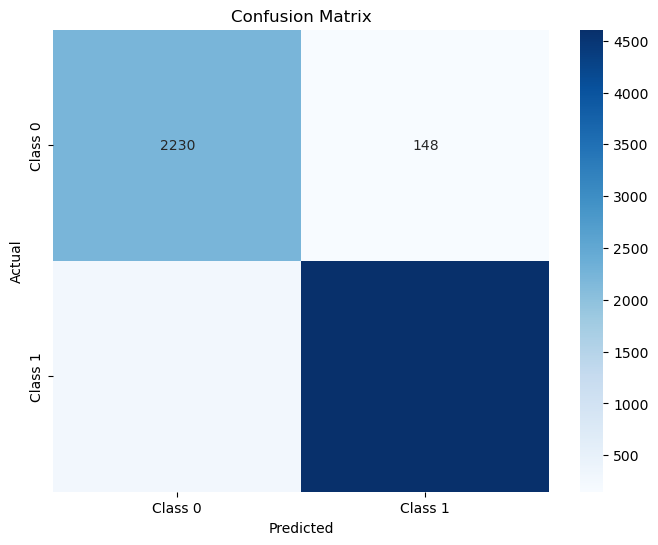

In [118]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [119]:
report = classification_report(y_test, y_pred)

In [120]:
df

,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,...,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,2,5,0,224,0,0,0,88.00,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,3,0,5,0,0,0,106.68,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,3,0,1,0,0,0,50.00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,2,0,211,0,0,0,100.00,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,2,0,48,0,0,0,77.00,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,0,2,0,346,0,0,0,115.00,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
36281,1,3,0,34,0,0,0,107.55,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36282,1,3,0,83,0,0,0,105.61,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
36283,0,4,0,121,0,0,0,96.90,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [121]:
# from joblib import dump
# dump(RFC, 'ML_Model.joblib')

In [122]:
import pickle
pickle.dump(RFC,open('Task3.pkl','wb'))

In [123]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\Users\mazen\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.
